<a href="https://colab.research.google.com/github/SAKSHIDHYANI/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project 2/SeoulBikeData.csv",encoding= 'unicode_escape')

In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.shape

(8760, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#column names
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# No Null Values
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
data['Seasons'].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
data.replace({'Holiday':{'No Holiday':0,'Holiday':1},'Seasons':{'Summer':3,'Spring':2,'Autumn':1,'Winter':0},'Functioning Day':{'Yes':1,'No':0}},inplace=True)


In [ ]:
data['Date']=pd.to_datetime(data['Date'],format="%d/%m/%Y")
data['weekday'] = data['Date'].dt.dayofweek
data['month'] = data['Date'].dt.month

In [ ]:
data.drop(columns='Date',inplace = True)

In [ ]:
data.head(15)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,month
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,0,1,4,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,0,1,4,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,0,1,4,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,0,1,4,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,0,1,4,12
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,0,1,4,12
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,0,1,4,12
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,0,1,4,12
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,0,1,4,12
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,0,1,4,12


**Finding Relationship of dependent variable with other independent variables**

In [ ]:

def relationship(column_name,ax_1):
  sns.scatterplot(x=column_name,y='Rented Bike Count',data=data,ax=ax_1,color = 'darkred')
 

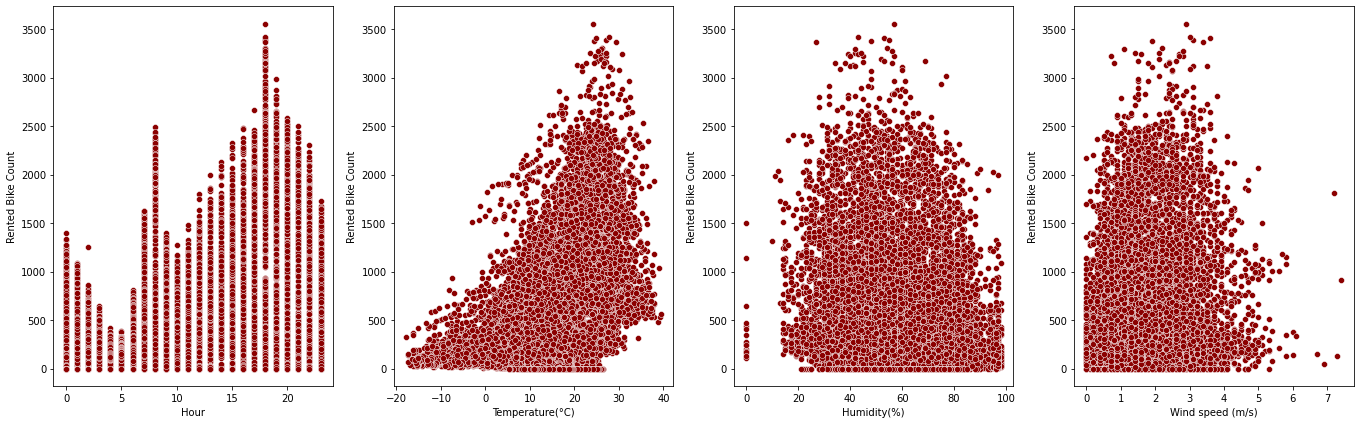

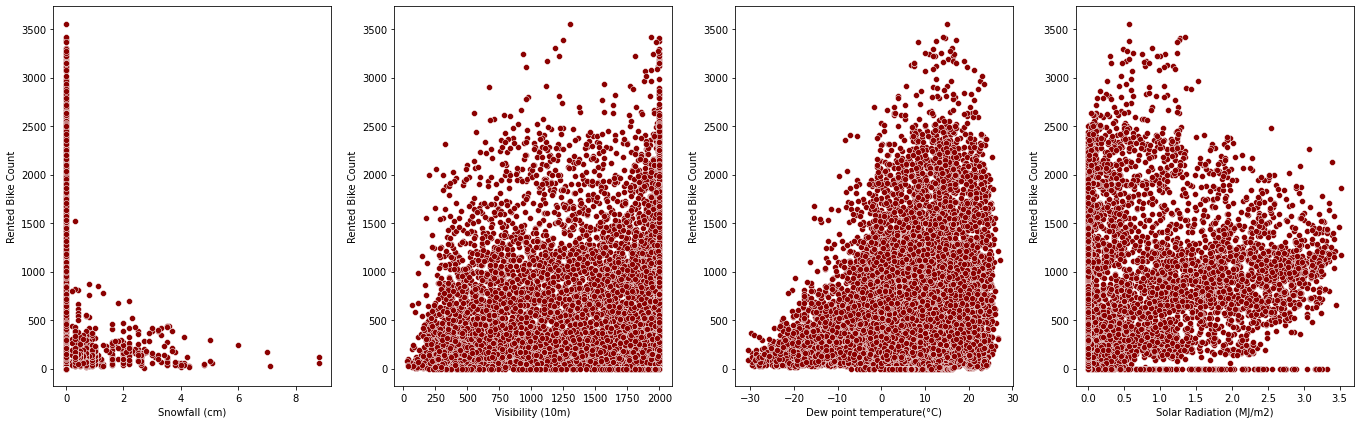

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(19,6))
relationship('Hour',ax1)
relationship('Temperature(°C)',ax2)
relationship('Humidity(%)',ax3)
relationship('Wind speed (m/s)',ax4)
fig.tight_layout()
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(19,6))
relationship('Snowfall (cm)',ax1)
relationship('Visibility (10m)',ax2)
relationship('Dew point temperature(°C)',ax3)
relationship('Solar Radiation (MJ/m2)',ax4)
fig.tight_layout()




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


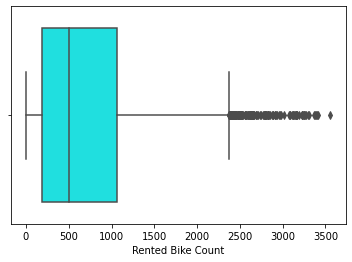

In [ ]:
sns.boxplot(data['Rented Bike Count'],color='cyan')



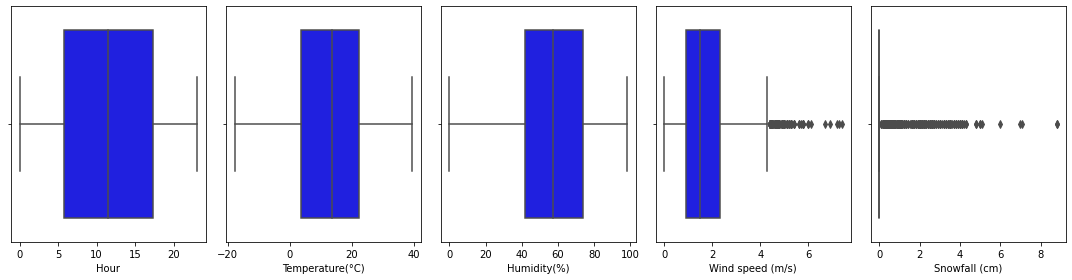

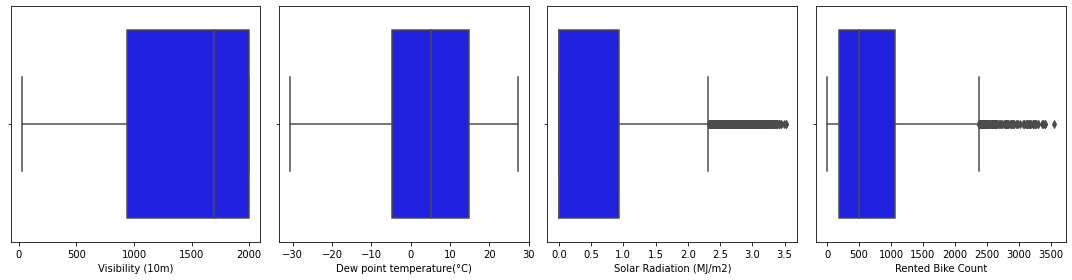

In [ ]:
def boxplotvar(column_name,ax_1):
  sns.boxplot(x=data[column_name],ax=ax_1,color = 'blue')

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(15,4))
boxplotvar('Hour',ax1)
boxplotvar('Temperature(°C)',ax2)
boxplotvar('Humidity(%)',ax3)
boxplotvar('Wind speed (m/s)',ax4)
boxplotvar('Snowfall (cm)',ax5)
fig.tight_layout()
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(15,4))
boxplotvar('Visibility (10m)',ax1)
boxplotvar('Dew point temperature(°C)',ax2)
boxplotvar('Solar Radiation (MJ/m2)',ax3)
boxplotvar('Rented Bike Count',ax4)
fig.tight_layout() 

Text(0.5, 1.0, 'Rental Bike Count Sum for different Seasons')

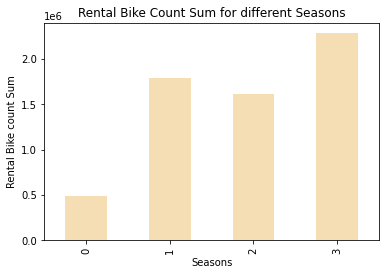

In [ ]:
data.groupby(['Seasons'])['Rented Bike Count'].sum().plot(kind="bar",color='wheat')
plt.ylabel("Rental Bike count Sum")
plt.title("Rental Bike Count Sum for different Seasons")

**Maximum rental bike count is for Summer Season**

Rental Bike Count for days on which there is a holiday: 215895
Rental Bike Count for days on which there is no holiday: 5956419
Average Rented Bike count


Text(0.5, 1.0, 'Average Rental Bike Count for Holiday or No Holiday')

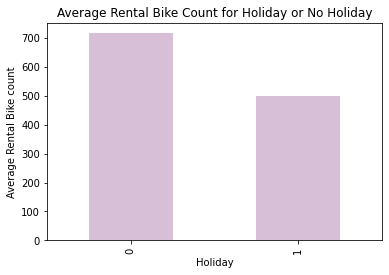

In [ ]:
print("Rental Bike Count for days on which there is a holiday:",data[data['Holiday'] == 1]['Rented Bike Count'].sum())
print("Rental Bike Count for days on which there is no holiday:",data[data['Holiday'] == 0]['Rented Bike Count'].sum())
print("Average Rented Bike count")
data.groupby(['Holiday'])['Rented Bike Count'].mean().plot(kind="bar",color='thistle')
plt.ylabel("Average Rental Bike count")
plt.title("Average Rental Bike Count for Holiday or No Holiday")


**Maximum rental bike count is for days when there is no holiday**

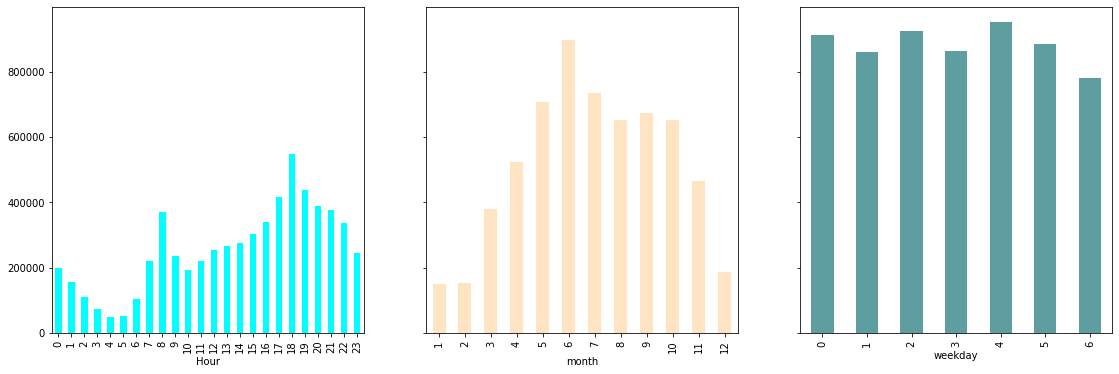

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(19,6),sharey=True)
data.groupby(['Hour'])['Rented Bike Count'].sum().plot(kind="bar",ax=ax1,color='cyan')

data.groupby(['month'])['Rented Bike Count'].sum().plot(kind="bar",ax=ax2,color='bisque')

data.groupby(['weekday'])['Rented Bike Count'].sum().plot(kind="bar",ax=ax3,color='cadetblue')


**1.Total Rented Bike count around 8 am and 5 pm or 6 pm (17:00 , 18:00 as per 24 hour clock) are maximum. mostly the time when people commute for work or back to home**

**2. Total Rented Bike count is maximum for 6th month(Month of June)  and minimum for month of January and February**

**3.Total Rented Bike count for Friday, Wednesday, Monday are maximum and low for sundays. That means people opt for rental bikes when they go to school or work.**


In [ ]:
independent_variables = ['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month','weekday']

In [ ]:
dependent_variables =  ['Rented Bike Count']

In [ ]:
correlation_calc = data[independent_variables].corr()

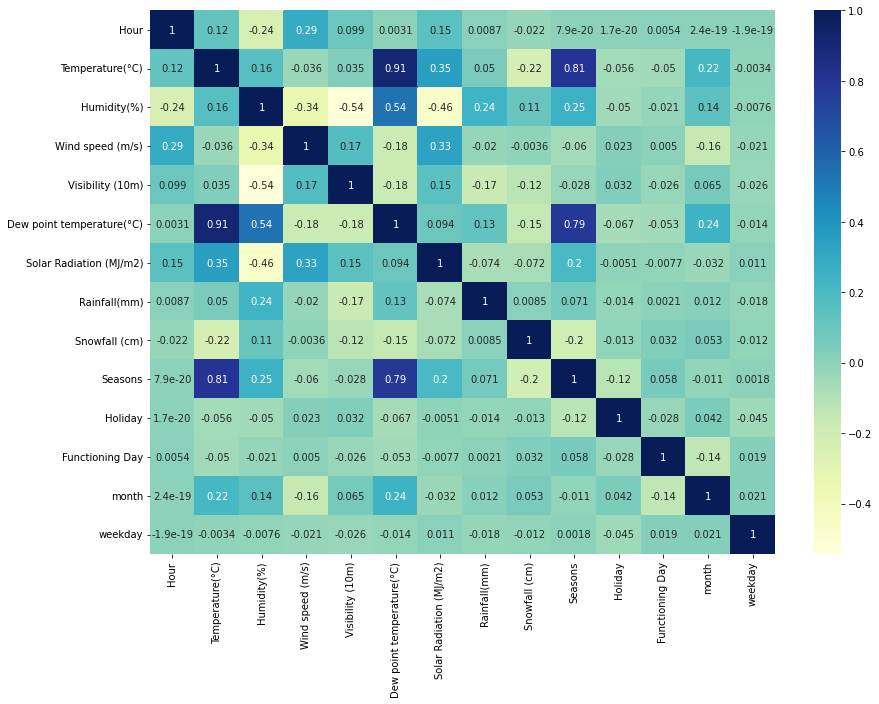

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="YlGnBu")

In [ ]:
# High correlation between Temperature and Dew Temperature,Temperature and Seasons so removing one of them
data.drop(columns='Dew point temperature(°C)',inplace =True)
data.drop(columns='Seasons',inplace =True)

In [ ]:

data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,weekday,month
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,4,12
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,4,12
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,4,12
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,4,12
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,4,12


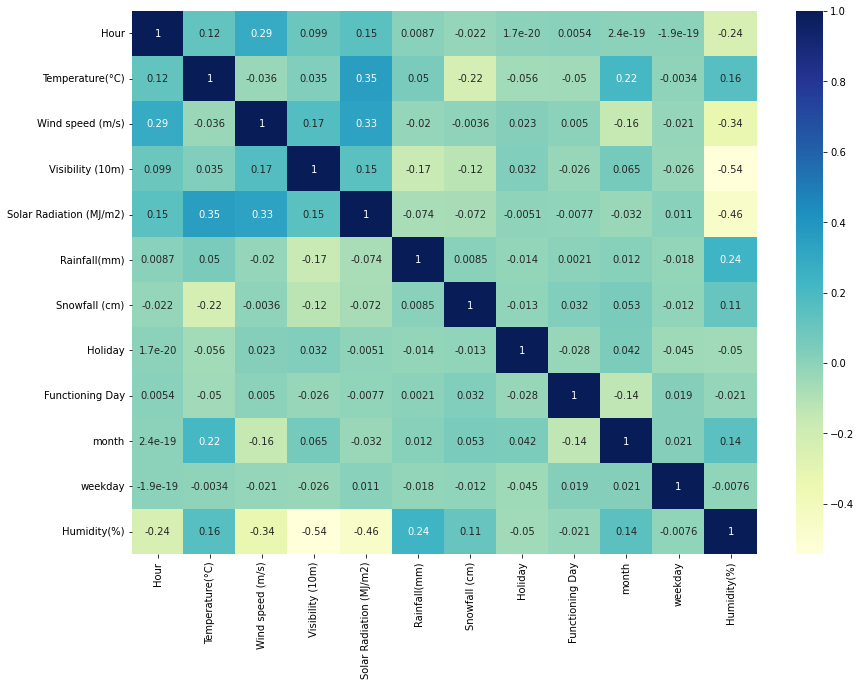

In [ ]:
independent_variables = ['Hour', 'Temperature(°C)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
       'Holiday', 'Functioning Day', 'month','weekday','Humidity(%)']
correlation_calc = data[independent_variables].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="YlGnBu")

In [ ]:
def regplot(col_name,i):
  sns.regplot(x = col_name, y = "Rented Bike Count", data = data,ax=axs[i], scatter_kws={"color": "plum"}, line_kws={"color": "darkmagenta"})
 

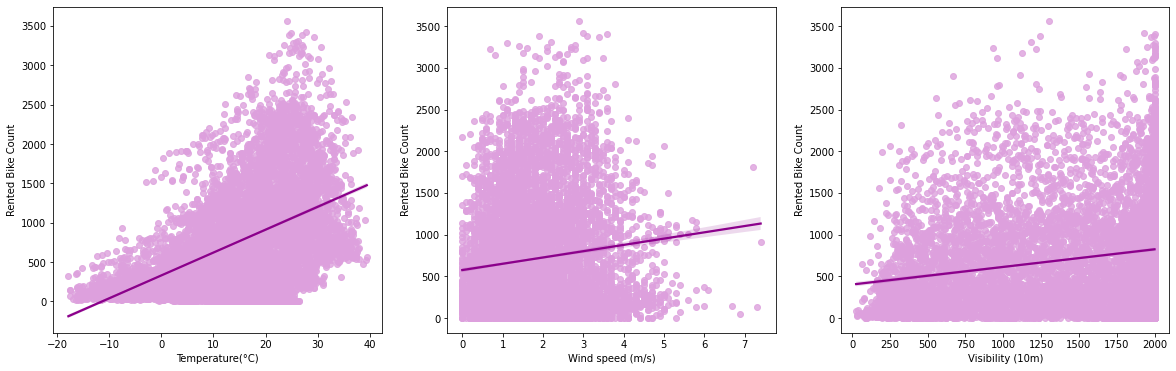

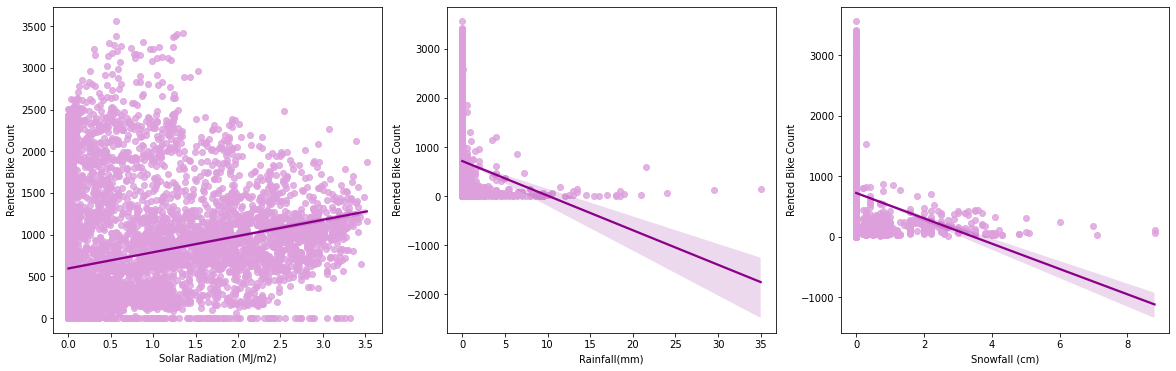

In [ ]:
fig, axs= plt.subplots(1,3,figsize=(20,6))
regplot('Temperature(°C)',0)
regplot('Wind speed (m/s)',1)
regplot('Visibility (10m)',2)
fig, axs= plt.subplots(1,3,figsize=(20,6))
regplot('Solar Radiation (MJ/m2)',0)
regplot('Rainfall(mm)',1)
regplot('Snowfall (cm)',2)


In [ ]:
df1Corr=pd.DataFrame(data.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("yellow", as_cmap=True))

,Correlation to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Functioning Day,0.203943
Visibility (10m),0.199280
month,0.133514
Wind speed (m/s),0.121108
weekday,-0.029357
Holiday,-0.072338


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inf_factor = pd.DataFrame()
var_inf_factor["variables"] = data.columns
var_inf_factor["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
var_inf_factor


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,variables,VIF
0,Rented Bike Count,4.626757
1,Hour,4.741772
2,Temperature(°C),5.059071
3,Humidity(%),14.481780
4,Wind speed (m/s),4.725174
5,Visibility (10m),7.224489
6,Solar Radiation (MJ/m2),2.505630
7,Rainfall(mm),1.105519
8,Snowfall (cm),1.132792
9,Holiday,1.069270


In [ ]:
data.drop(columns=["Humidity(%)","Functioning Day"],inplace=True)


In [ ]:
var_inf_factor = pd.DataFrame()
var_inf_factor["variables"] = data.columns
var_inf_factor["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
var_inf_factor

,variables,VIF
0,Rented Bike Count,3.972645
1,Hour,4.635206
2,Temperature(°C),3.680006
3,Wind speed (m/s),4.342678
4,Visibility (10m),5.557027
5,Solar Radiation (MJ/m2),1.913379
6,Rainfall(mm),1.082689
7,Snowfall (cm),1.097455
8,Holiday,1.067589
9,weekday,2.801710


In [ ]:
independent_variables = ['Hour', 'Temperature(°C)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
       'Holiday', 'month','weekday']
X_train, X_test, y_train, y_test = train_test_split(data[independent_variables], data[dependent_variables], test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(7008, 10)

In [ ]:
X_test.shape

(1752, 10)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predicted = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

In [ ]:
regressor.coef_

array([[  701.00156359,  1502.35349442,   142.38047837,   254.39432747,
            9.5709386 , -2539.48650003,  -237.81963375,  -161.90292166,
           60.44547146,   -54.00707851]])

In [ ]:
regressor.intercept_

array([-646.5602994])

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2 square is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  

In [ ]:
print("Evaluation metrics for training data:")
print_metrics(y_train,y_train_pred)



Evaluation metrics for training data:
MSE is 224810.54998379524
RMSE is 474.14190911982803
R2 square is 0.45860486797324185
MAE is 349.6287205425767
MAPE is Rented Bike Count    inf
dtype: float64


In [ ]:
print("Evaluation metrics for test data:")

print_metrics(y_test, y_predicted)

Evaluation metrics for test data:
MSE is 238987.74447968812
RMSE is 488.863727923936
R2 square is 0.4289728892237509
MAE is 360.66897260955756
MAPE is Rented Bike Count    inf
dtype: float64


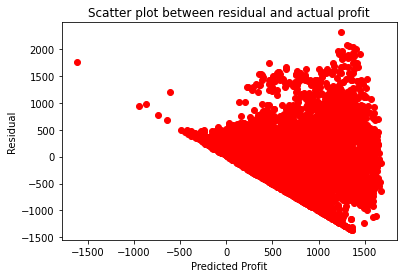

In [ ]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_predicted
#  Plotting scatter plot between residual and fitted values
plt.scatter(y_train_pred, residuals_train,c='red')
plt.title('Scatter plot between residual and actual profit')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual')
plt.show()

In [ ]:
round((np.mean(residuals_train)))

Rented Bike Count   -0.0
dtype: float64

In [ ]:
def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))
adjusted_r2(len(y_train),len(independent_variables), y_train, y_train_pred)  

0.45783111474753546

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.42565307822861853, 0.45568254456948126)

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)          
                        
model.fit( X_train, y_train )
yhat = model.predict(X_test)
print_metrics(y_test, yhat)

MSE is 239291.41439907148
RMSE is 489.17421681755826
R2 square is 0.42824731328648835
MAE is 360.81188832136394
MAPE is Rented Bike Count    inf
dtype: float64
